#Relationship Between Variables



 
  


In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

In [ ]:
# loading data set as Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleaning - Univariate Analysis

In [ ]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [ ]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

Now computing the Measure of central tendency of the values in column height. Remember taking only a single column of the data set we are making a univariate analysis.

In [ ]:
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.724878048780525 54.1 0    50.8
dtype: float64


Now let's visualize this analysis in graph.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


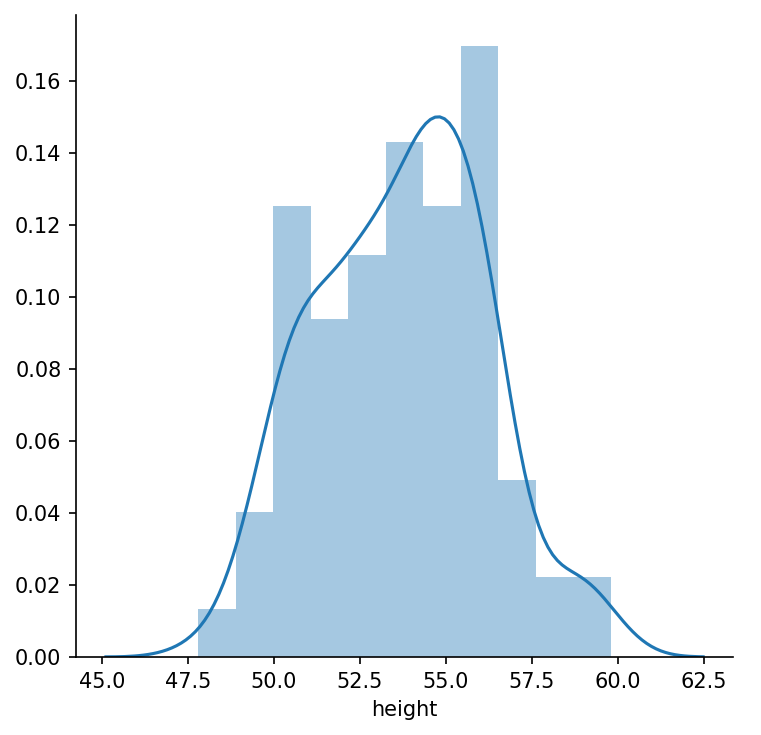

In [ ]:
#distribution plot
sns.FacetGrid(df,size=5).map(sns.distplot,"height").add_legend()

From the above graph, we can observe that the hight of maximum cars ranges from 53 to 57.

Now, let's draw the same with price. Since data type of price is object so first change object to numeric data type.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


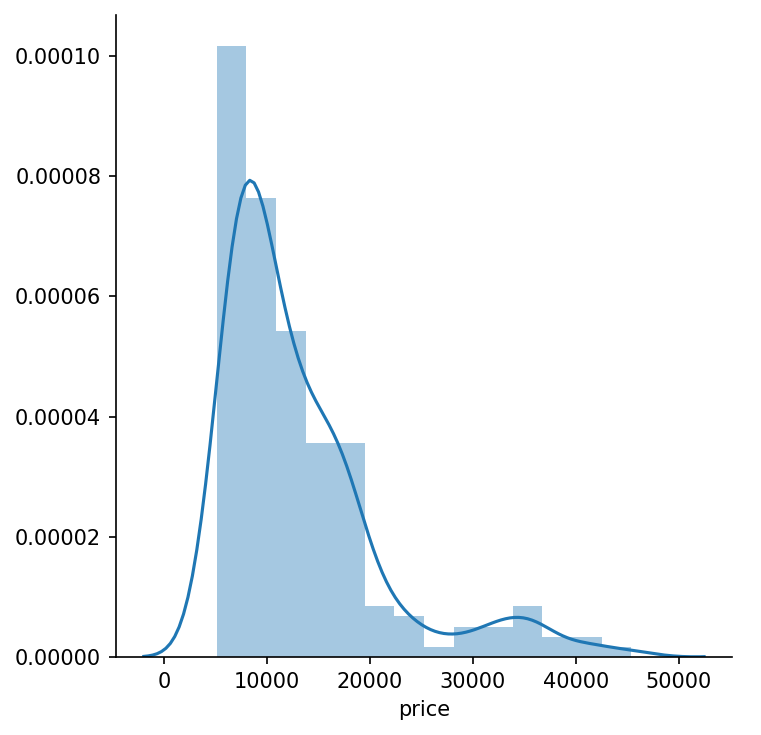

In [ ]:
#distribution plot
sns.FacetGrid(df,size=5).map(sns.distplot,"price").add_legend()

From the above graph, we can say that the price ranges from 5,000 to 45,000 but the maximum car price ranges between 5,000 to 10,000.

The box plot is also efective visual representation of statical measures like median and quartiles in univariate analysis.

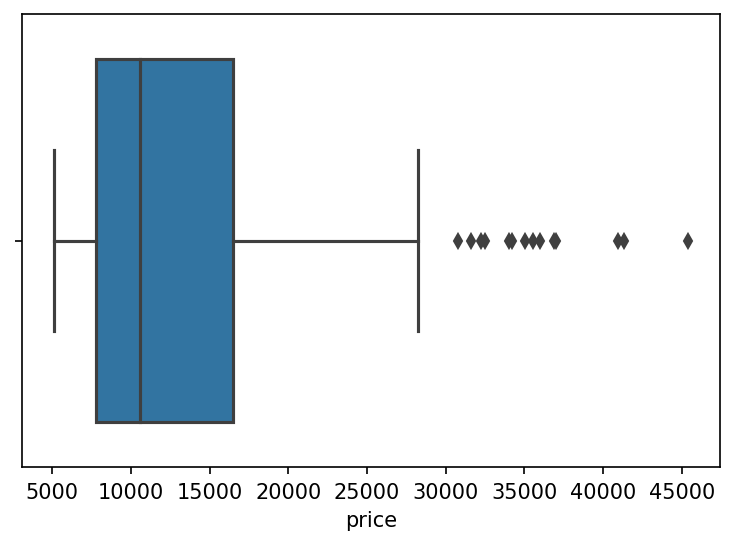

In [ ]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

The right border of the box is Q3 and the left border of the box is Q1. Lines extend from both sides of the box boundaries toward the minimum and maximum. Based on the convention our plotting tool uses, though, they may only extend to a certain statistic; any values beyond these statistics are marked as outliers (using points).[Referance:HANDSON_DATA_ANALYSIS_WITH_PANDAS.pdf]
 

#Bivariate Analysis



Text(0, 0.5, 'price')

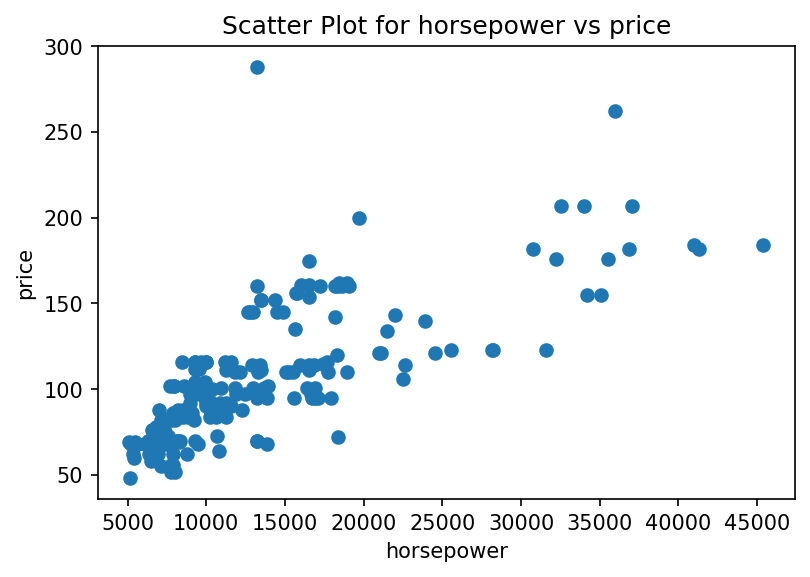

In [ ]:
# plot the relationship between “horsepower” and ”price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

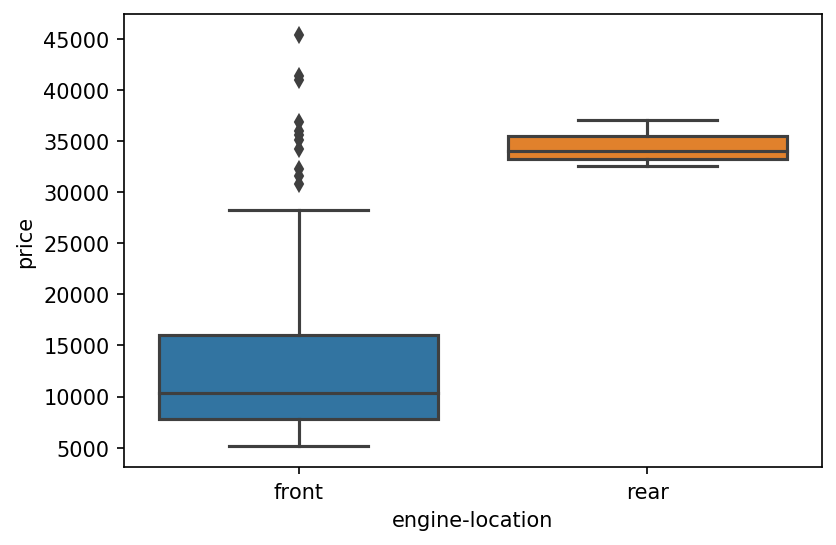

In [ ]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

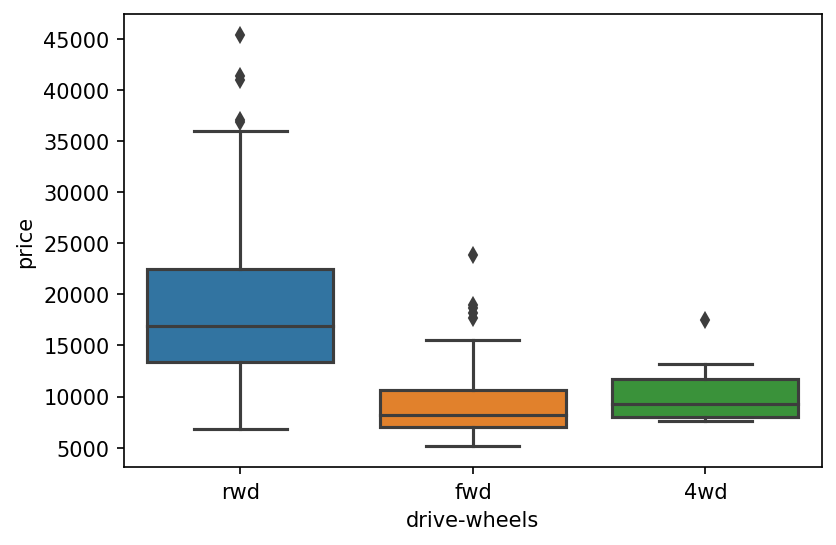

In [ ]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

Figure above illustrates the range of prices in cars with different wheel types. Boxplot shows the average and median price in respective wheel types and some outliers.

#Multivariate Analysis



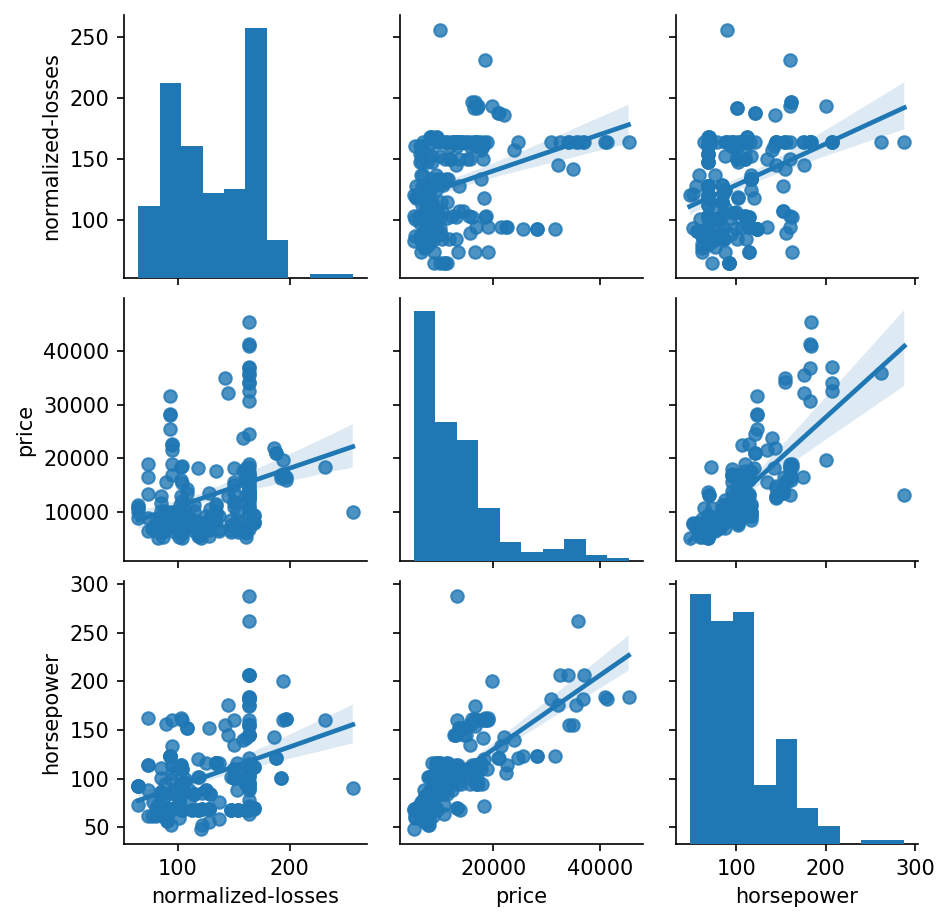

In [ ]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  kind="reg")
plt.show()

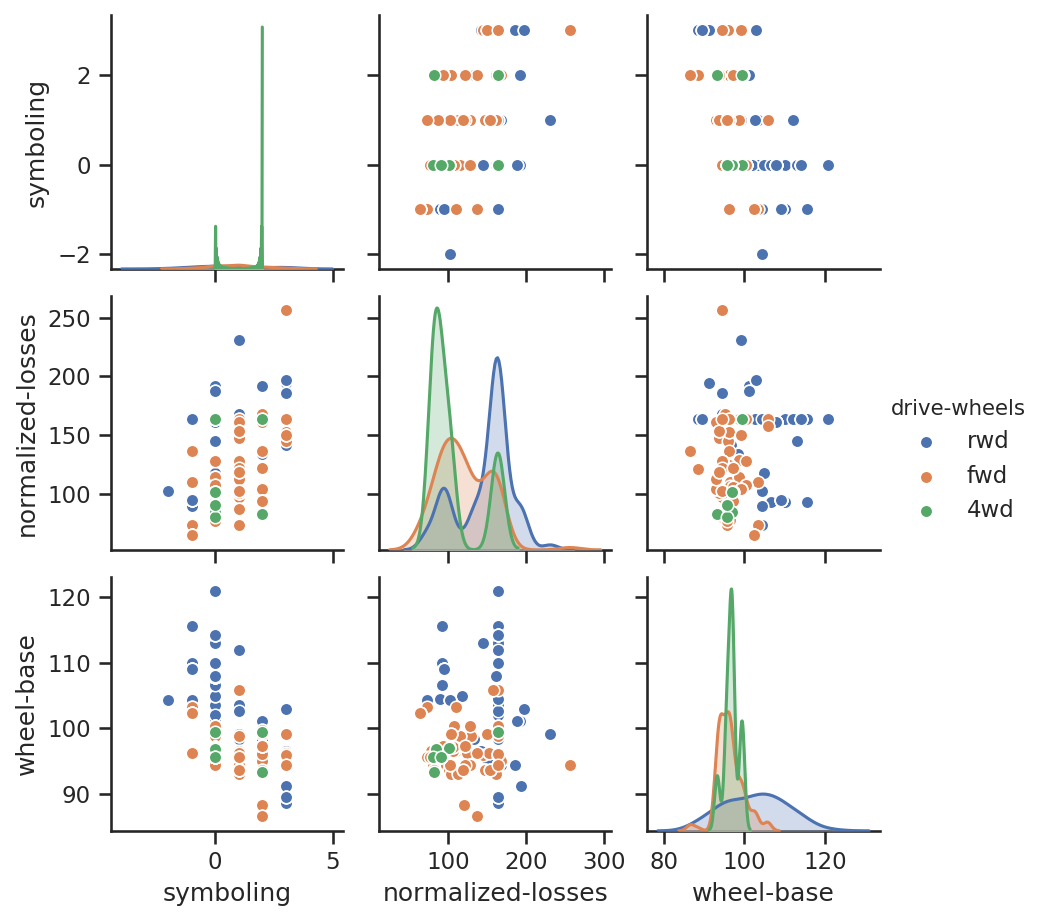

In [ ]:
 #pair plot (matrix scatterplot) of few columns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")
plt.show()

In [ ]:
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446597316e-39
cor:		 0.757945621793524


Here the correlation of these two variable is 0.80957 which is close to +1 thus we can make sure that price and horsepower are highly positively correlated. Using pandas corr( function correlation between entire numerical record can be calculated.

In [ ]:
correlation = df.corr(method='pearson')
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


Now let's visualize this correlation analysis with heatmap. Heatmap is best technique to make this look beautiful and easier to interpret.

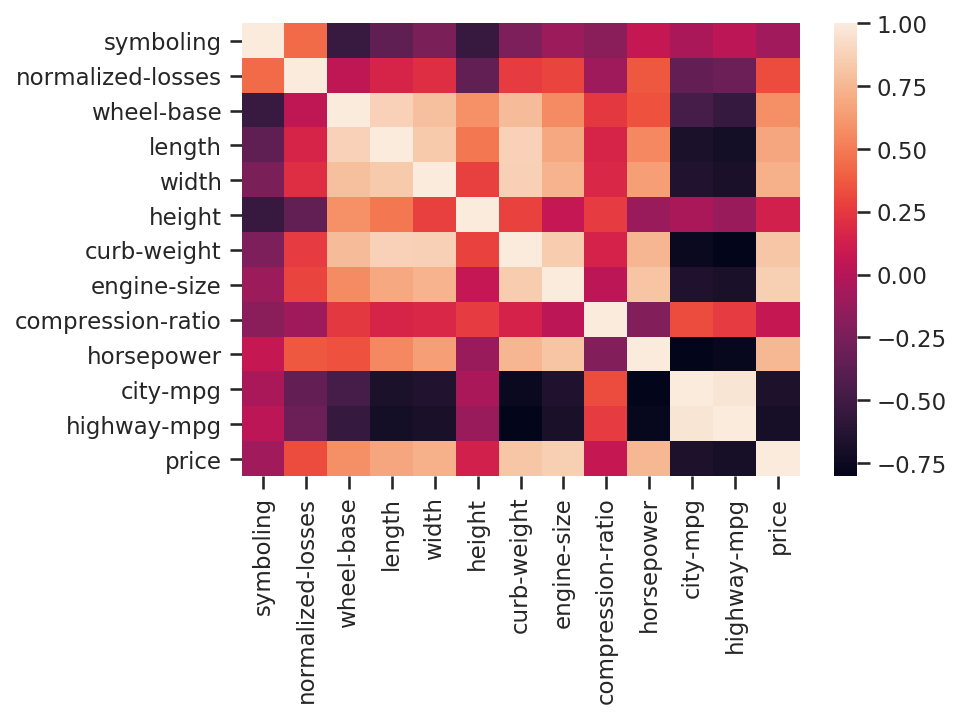

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)
          

A coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

#Multivariate Analysis over titanic dataset


In [ ]:
#load data set
titanic=pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%207/titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape


(891, 12)

Let’s take a  look at what is the number of records missing in the data set.

In [ ]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
#percentage of women survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

#percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) +" % of women who survived." )
print(str(rate_men) + " % of men who survived." )

0.7420382165605095 % of women who survived.
0.18890814558058924 % of men who survived.


You can see the number of females survival was high, so gender could be the attribute that contributes to analyzing the survival of any variable(person). Let's visualize this information on survival numbers in males and females.

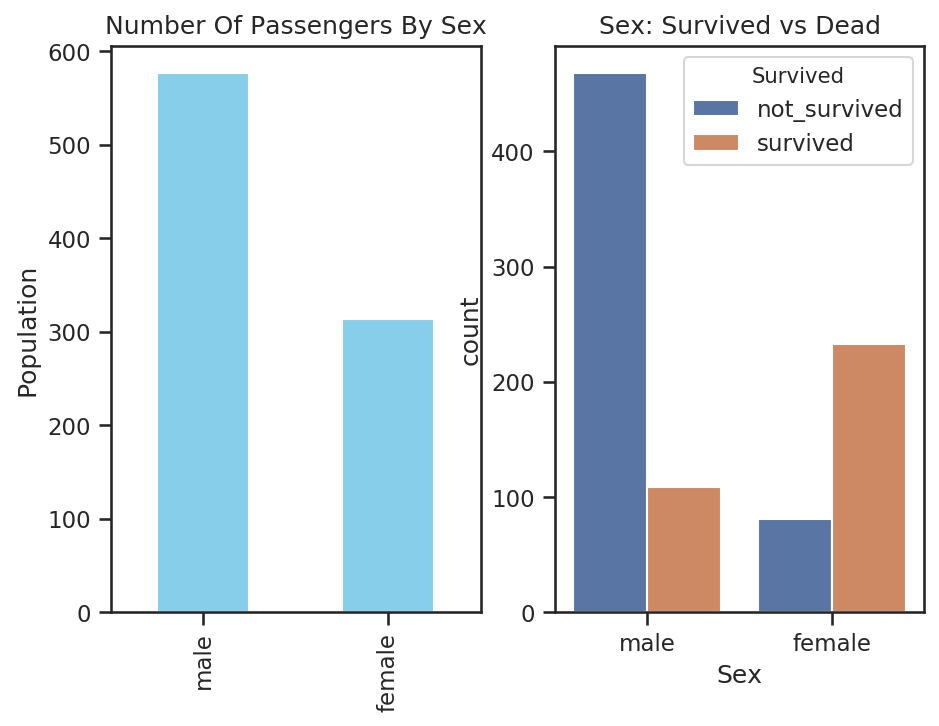

In [ ]:
titanic['Survived'] = titanic['Survived'].map({0:"not_survived", 1:"survived"})

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

Let's visualize the number of survival and death from different Pclasses.

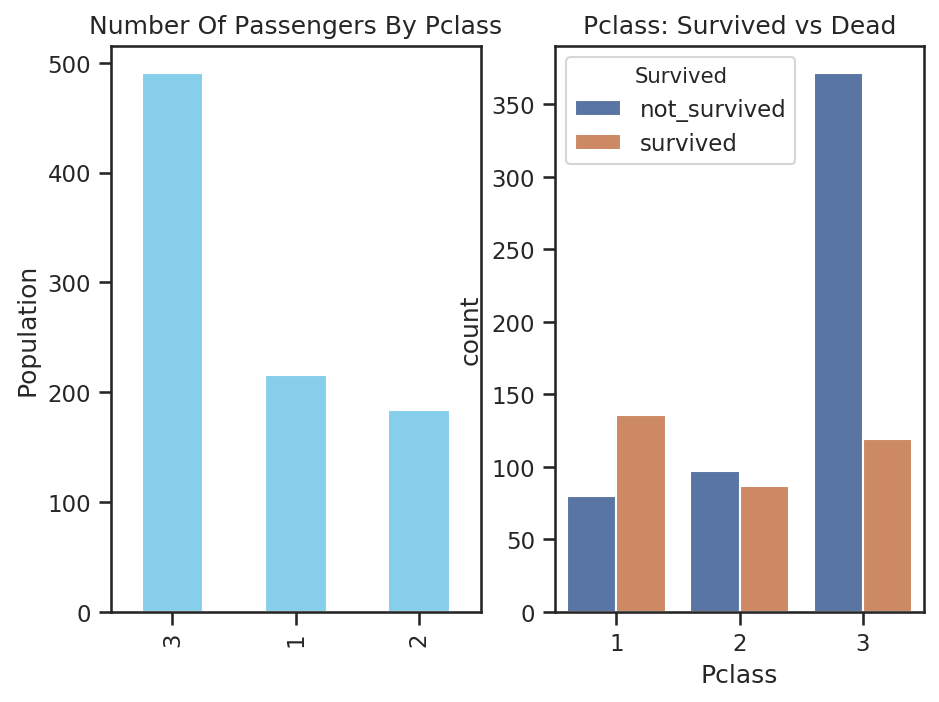

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot("Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

Looks like the number of passenger in Pclass 3 was high and maximum of them could not survive. death  Pclass the number of death is high. And in Pclass 1 maximum of the passengers were survived.

In [ ]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,not_survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,not_survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,not_survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,not_survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


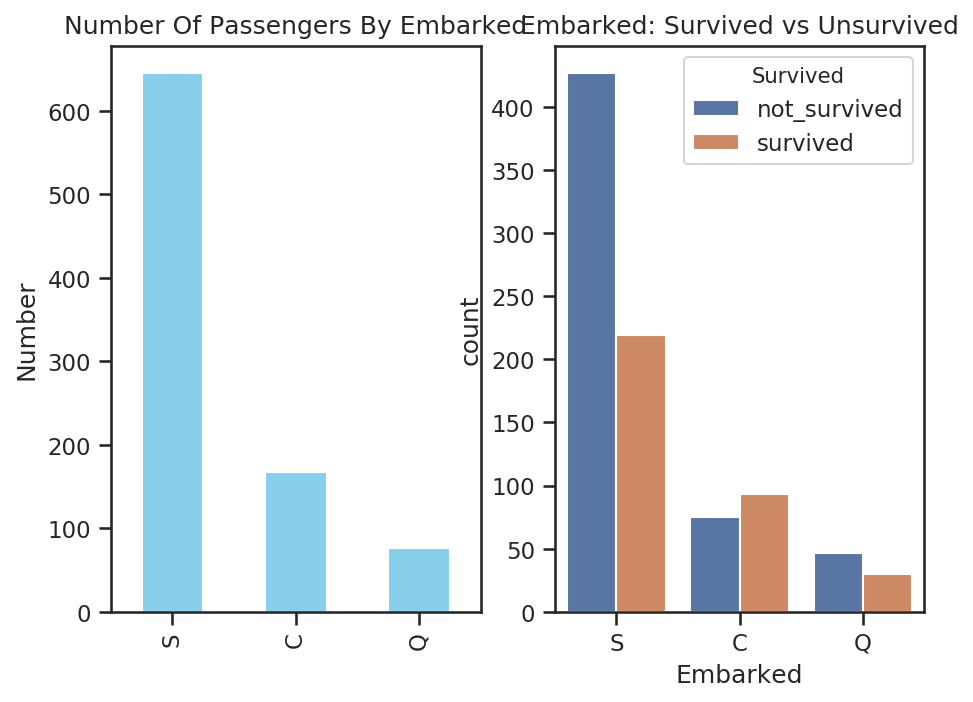

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot("Embarked", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

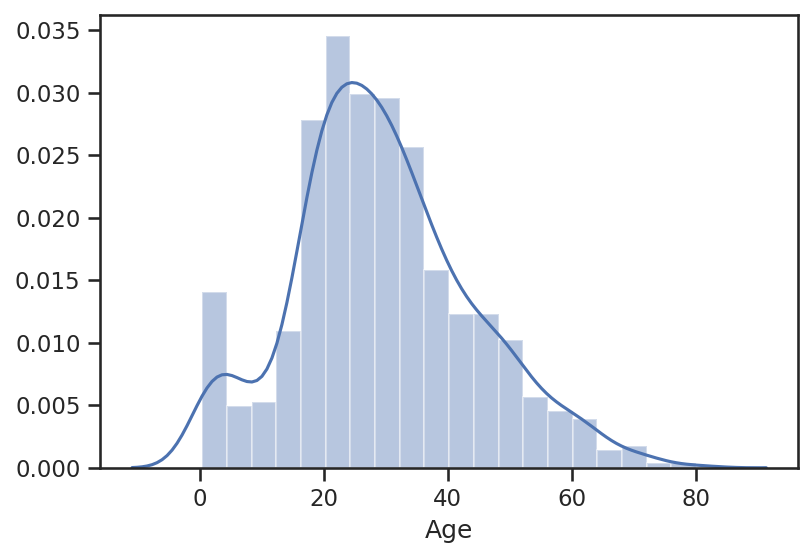

In [ ]:
sns.distplot(titanic['Age'].dropna())

Now let's do first multivariate analysis into titanic data set with variables Survived, Pclass,Fear and Age. 

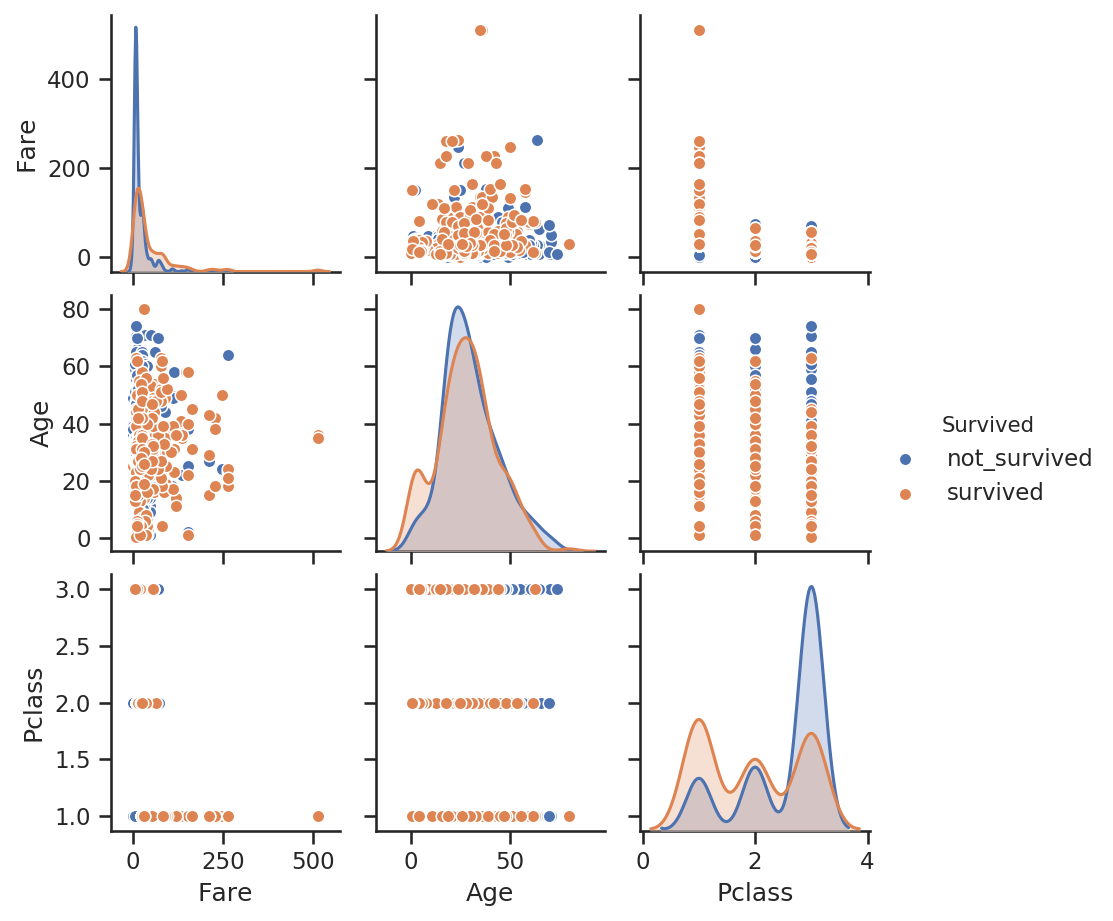

In [ ]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()


Now lets' view the correlation table with heatmap. But first map Embarked records with integer values so that we can include Embrake too in our correlation analysis.

In [ ]:
titanic['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2,"NaN":0})
Tcorrelation = titanic.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022204
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.074053
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.023233
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068734
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.060814
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.162184
Embarked,-0.022204,-0.074053,0.023233,-0.068734,-0.060814,0.162184,1.000000


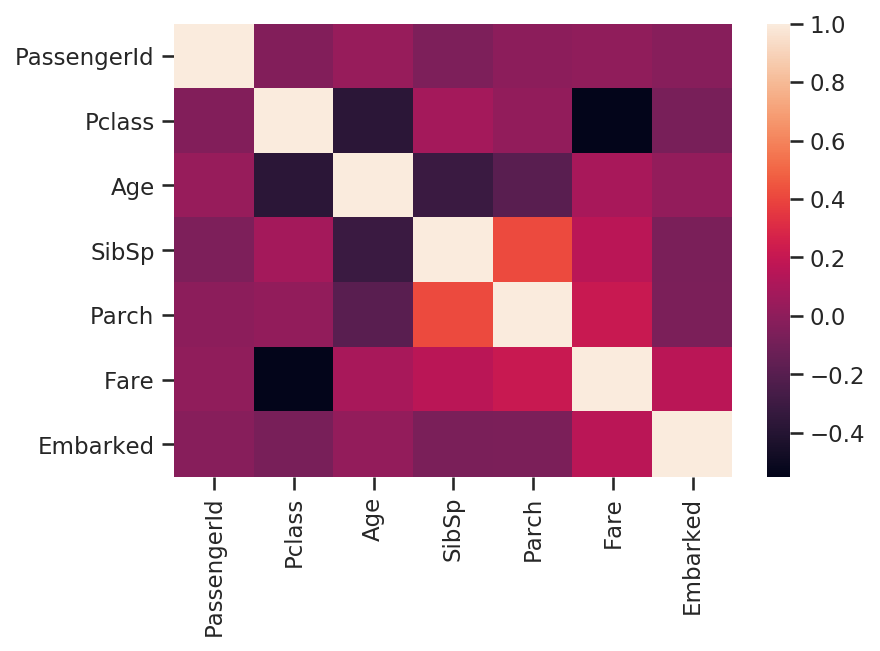

In [ ]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns)
          

In [ ]:
#importing the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('TrainingWiDS2021.csv')
test = pd.read_csv('UnlabeledWiDS2021.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(165), int64(10), object(6)
memory usage: 49.6+ MB


In [ ]:
#describing the data
train.describe().T



,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,35929.0,17965.000000,10371.953247,1.000000,8983.000000,17965.000000,26947.000000,35929.00000
encounter_id,35929.0,213061.739041,38022.933390,147003.000000,180152.000000,213017.000000,246047.000000,279000.00000
hospital_id,35929.0,111.696763,47.460339,4.000000,77.000000,118.000000,147.000000,204.00000
age,34455.0,62.806501,16.689535,0.000000,53.000000,65.000000,76.000000,89.00000
bmi,33588.0,29.130637,8.292394,14.844926,23.612229,27.547601,32.854623,67.81499
...,...,...,...,...,...,...,...,...
immunosuppression,35928.0,0.031062,0.173488,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,35928.0,0.006986,0.083292,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,35928.0,0.004119,0.064051,0.000000,0.000000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,35928.0,0.022295,0.147642,0.000000,0.000000,0.000000,0.000000,1.00000


(35929, 181)
35929
64


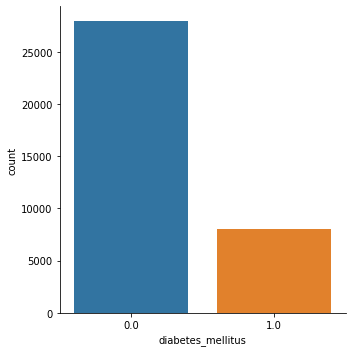

In [ ]:
#univariate analysis
print(train.shape)
print(train.encounter_id.nunique())
print(train.hospital_id.nunique())
sns.catplot(x ='diabetes_mellitus', kind ='count',data = train)


In [ ]:
# Imbalance Ratio
train.diabetes_mellitus.value_counts(normalize=True)



0.0    0.777778
1.0    0.222222
Name: diabetes_mellitus, dtype: float64

<Figure size 432x360 with 0 Axes>

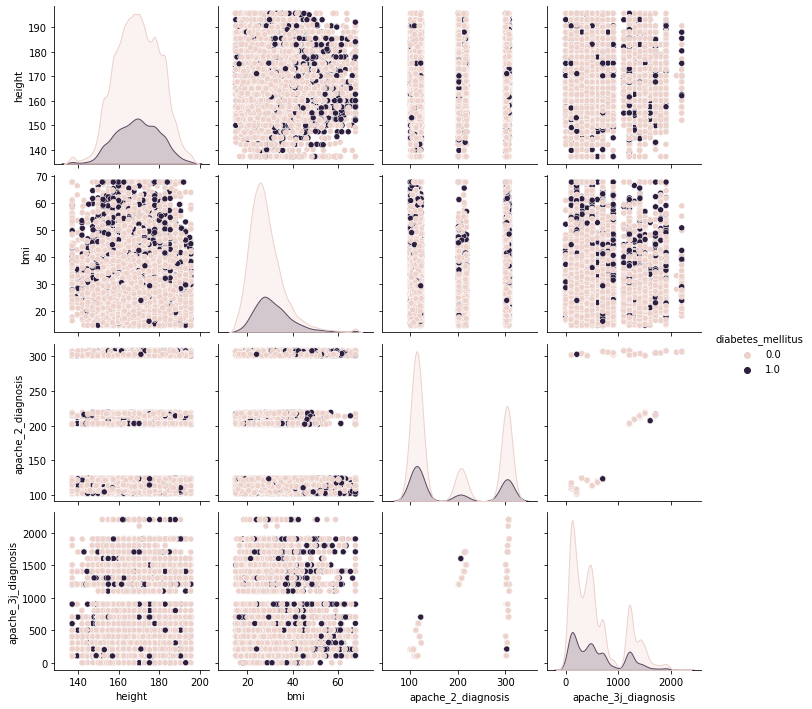

In [ ]:
#multivariate analysis
plt.figure(figsize= (6,5))
sns.pairplot(train[['height','bmi','apache_2_diagnosis','apache_3j_diagnosis',
                    'diabetes_mellitus']],hue = 'diabetes_mellitus')
plt.show()

## **Problem 1 - Univariate analysis**

## Q1: Import all necessary libraries

In [ ]:
# your code is here
import numpy as np
import pandas as pd

##Q2: Load the dataset from the following address 
"https://drive.google.com/uc?id=1g3CDt5caElsLGPNooOju1uJ6CwOCeMTZ"

In [ ]:
#Write your code here
df = pd.read_csv("https://drive.google.com/uc?id=1g3CDt5caElsLGPNooOju1uJ6CwOCeMTZ")

##Q3: In order to explore the dataset, print first five rows of the dataset?

In [ ]:
# your code is here
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Before analyzing any data set, inspect the data types of the data variables. Then, one can decide on the right methods for univariate data visualization.

##Q4-6
 - Show the dataset and print the shape of Dataset 
 - Find the datatype of the variables of Dataframe
 - Display all the column names of the DataSet

In [ ]:
#Sol 4
print(df)
print("\nShape of Dataframe (Rows, Columns)\n",df.shape)

#Sol 5
print("\nDatatype of all columns in Dataset\n",df.dtypes)

#Sol 6
print("\nColumns in the Dataset\n",df.columns)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## Visualization



### Q7: Name & Import the libraries that you might use for the visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##Uni-variate plots are of two types: 

1)Enumerative plots 

2)Summary plots

##Univariate enumerative Plots :
These plots enumerate/show every observation in data and provide information about the distribution of the observations on a single data variable. We now look at different enumerative plots

### Q8:Create a scatter plot of "Sepal Width"?

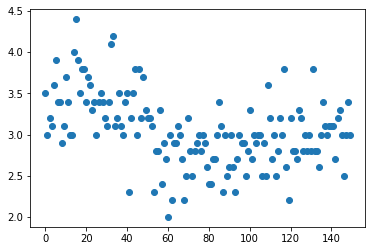

In [ ]:
# your code is here
plt.scatter(df.index,df['SepalWidthCm'])
plt.show()

### Q9: How to differentiate between the data values according to the categories they belong to with the help of coding?

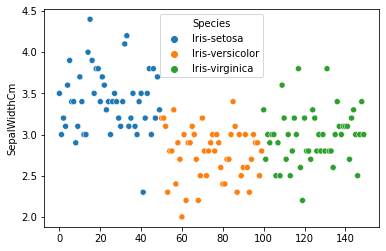

In [ ]:
# your code is here
sns.scatterplot(x=df.index,y=df['SepalWidthCm'],hue=df['Species'])

## Uni-variate summary plots
These plots give a more concise description of the location, dispersion, and distribution of a variable than an enumerative plot

### Q10: Display the counts or relative frequencies of values falling in different class intervals or ranges?

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

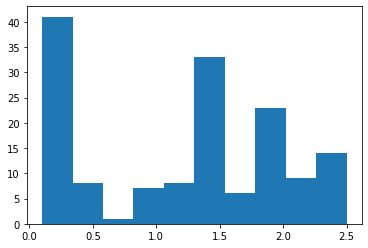

In [ ]:
# your code is here
plt.hist(df['PetalWidthCm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


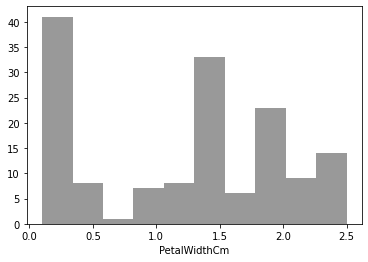

In [ ]:
# your code is here
sns.distplot(df['PetalWidthCm'],kde=False,color='black',bins=10)

# Problem 2 - Bivariate Analysis





### Q1: How to plot the graph between Numerical-Numerical variables?

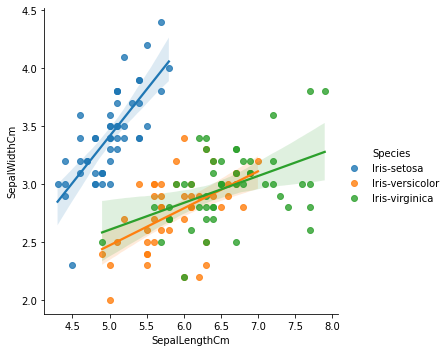

In [ ]:
# your code is here
sns.lmplot(x= "SepalLengthCm", y= "SepalWidthCm", hue= "Species", fit_reg=True, data=df)

### Q2: What is the function of fit_reg?

In [ ]:
## Ans2: If True, estimate and plot a regression model relating the x and y variables.

### Q3: Plot the graph without regression line?

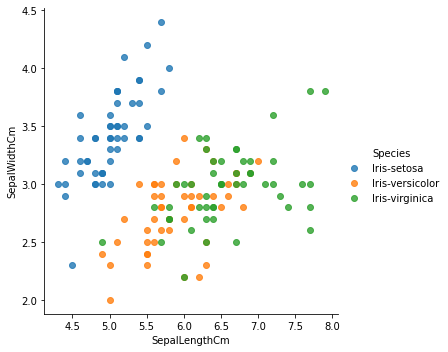

In [ ]:
# your code is here
sns.lmplot(x= "SepalLengthCm", y= "SepalWidthCm", hue= "Species", fit_reg=False, data=df)

### Q4: How will you visualize the relationship and distribution variables with one another?

### Ans: We can use scatter plot matrix.

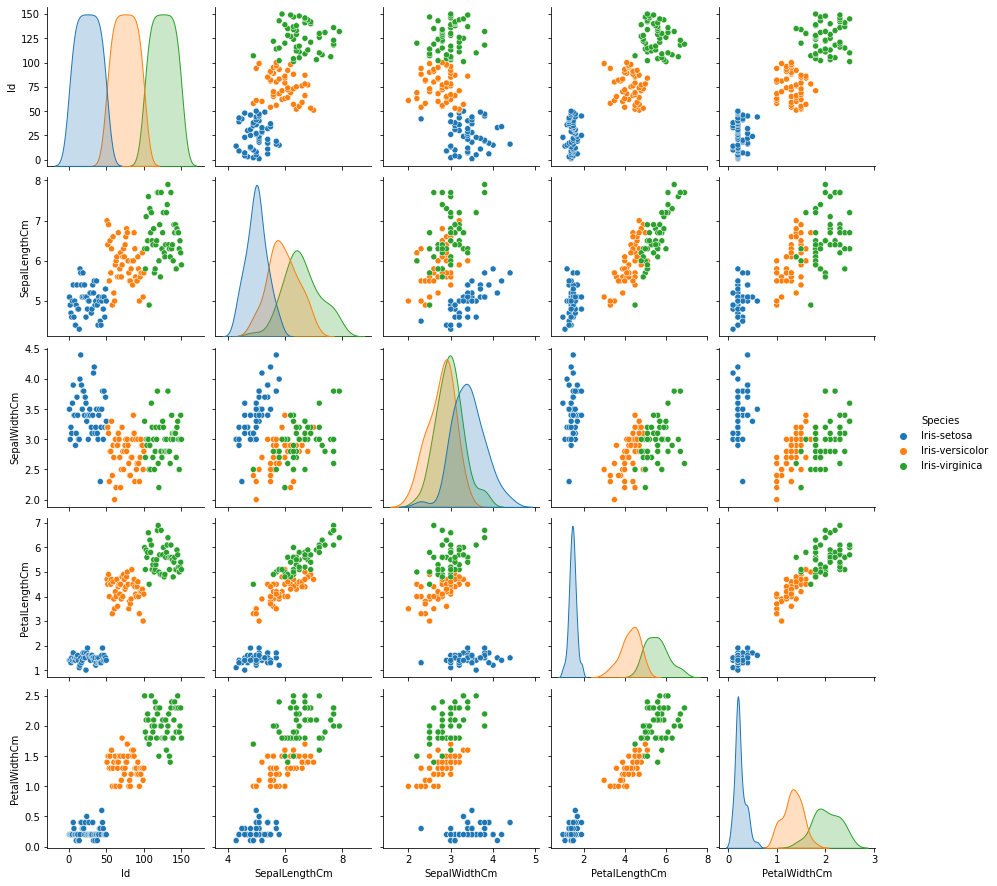

In [ ]:
# your code is here
sns.pairplot(hue="Species", data=df)

### Q5: How to find correlation between variables with the help of statistical way?

In [ ]:
# your code is here
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Q6: Plot the correlation between variables?

Ans: Use correlation matrix to see parametrs which best correlate each other According to the correlation matrix results PetalLengthCm and PetalWidthCm have possitive correlation which is proved by the plot below.


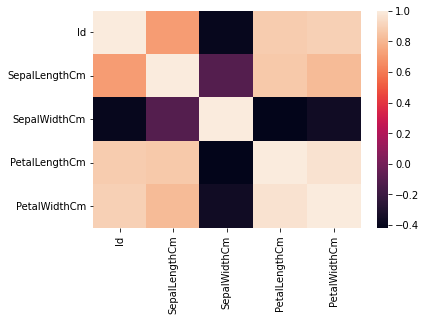

In [ ]:
# your code is here
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


## Bivariate analysis with Categorical-Categorical variables

### Q1: Load the dataset?

### Click here to get the [Titanic DataSet.](https://drive.google.com/file/d/1dp5i7pNwE5edFLatWfZvGgLOazCwUZYk/view?usp=sharing)

In [ ]:
# your code is here
tf = pd.read_csv("/content/train (1).csv")

### Q2: In order to explore the dataset, Show first Five rows of the dataset?



In [ ]:
tf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q3: What would be the gender ratio correspond to Survived and not Survived passenger?

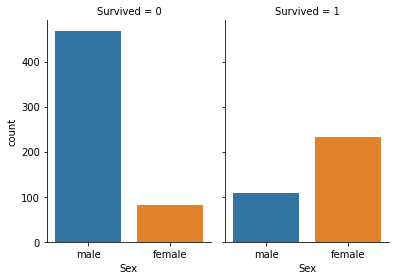

In [ ]:
# your code is here
sns.catplot(x="Sex", col="Survived", data=tf, kind="count", height=4, aspect=0.7)

We can clearly see that male survival rate is arround 19% where as female suvival rate is  arround 75% which suggest that gender has strong relationship with survival rates.

### Another way we can plot

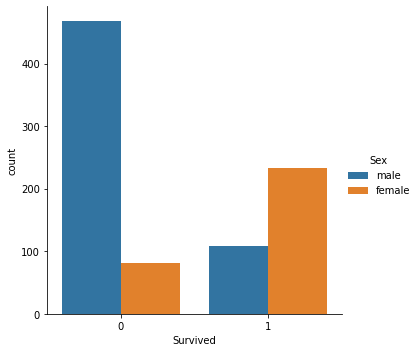

In [ ]:
# your code is here
sns.catplot(x='Survived',hue="Sex",data=tf,kind = "count")

### Q4: Use box plot to analyse survided corresponding to Age.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


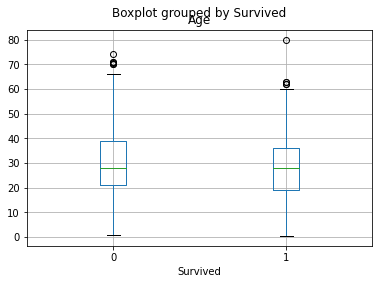

In [ ]:
# your code is here
tf.boxplot(column="Age",by="Survived")

### Q5: Create the plot between Age and Fare variables with the help of joint plot?

1-Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

2-A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X).


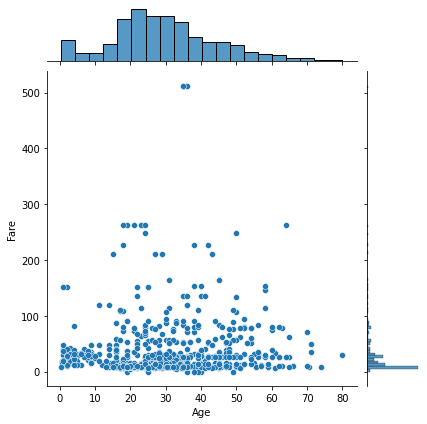

In [ ]:
# your code is here
sns.jointplot(x="Age",y="Fare",data=tf)

# Multivariate Analysis

1-We perform multivariate analysis with more than 2 variables for any combination of categorical and continuous variables.

2-The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

3-Different methods are used to tackle these combinations during analysis process.

##Q1: Draw the Box plot to analyse the relationship between the median of male and female survival?

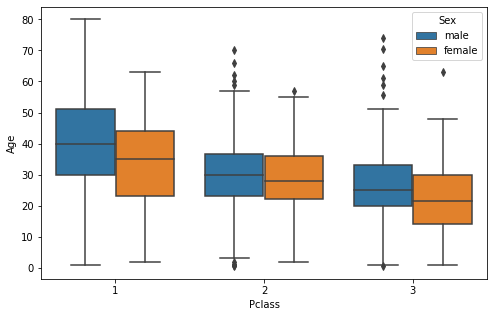

In [ ]:
# your code is here
fig, ax1 = plt.subplots(figsize=(8,5))  ## creating the figure of specific size
testPlot = sns.boxplot(ax=ax1, x='Pclass', y='Age', hue='Sex', data=tf)

##Q2: Draw the Catplot to elaborate more about the survived data Pclass and sex?

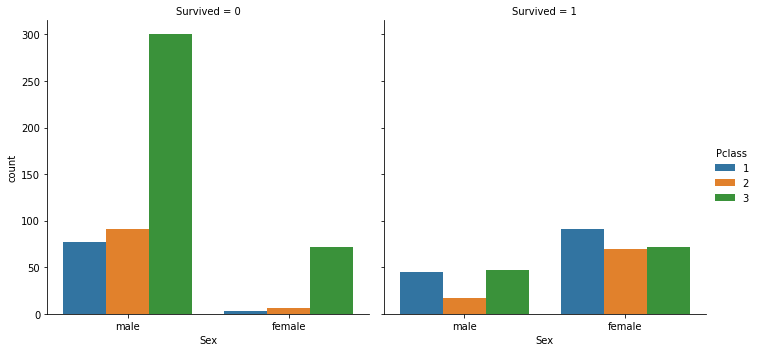

In [ ]:
#your code is here
sns.catplot(data=tf,col = "Survived",x = "Sex", hue="Pclass",kind = "count")

##Q3: Draw the co-relation matrix that is heat map in order to explore the relation between the variables(columns)?

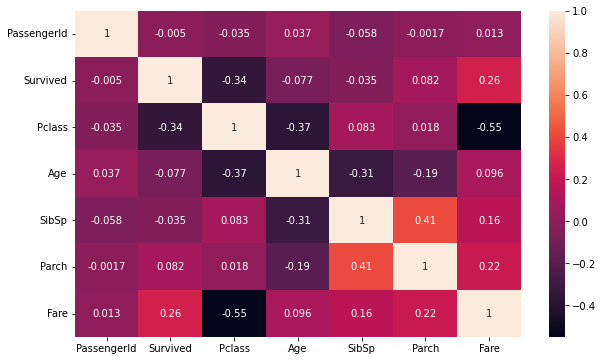

In [ ]:
#your code is here
fig,ax = plt.subplots(figsize = (10,6)) ## creating the figure of specific size
corr = tf.corr()
sns.heatmap(corr,annot=True)

##Q4: Draw the pairplot to understand the multivariate analysis?

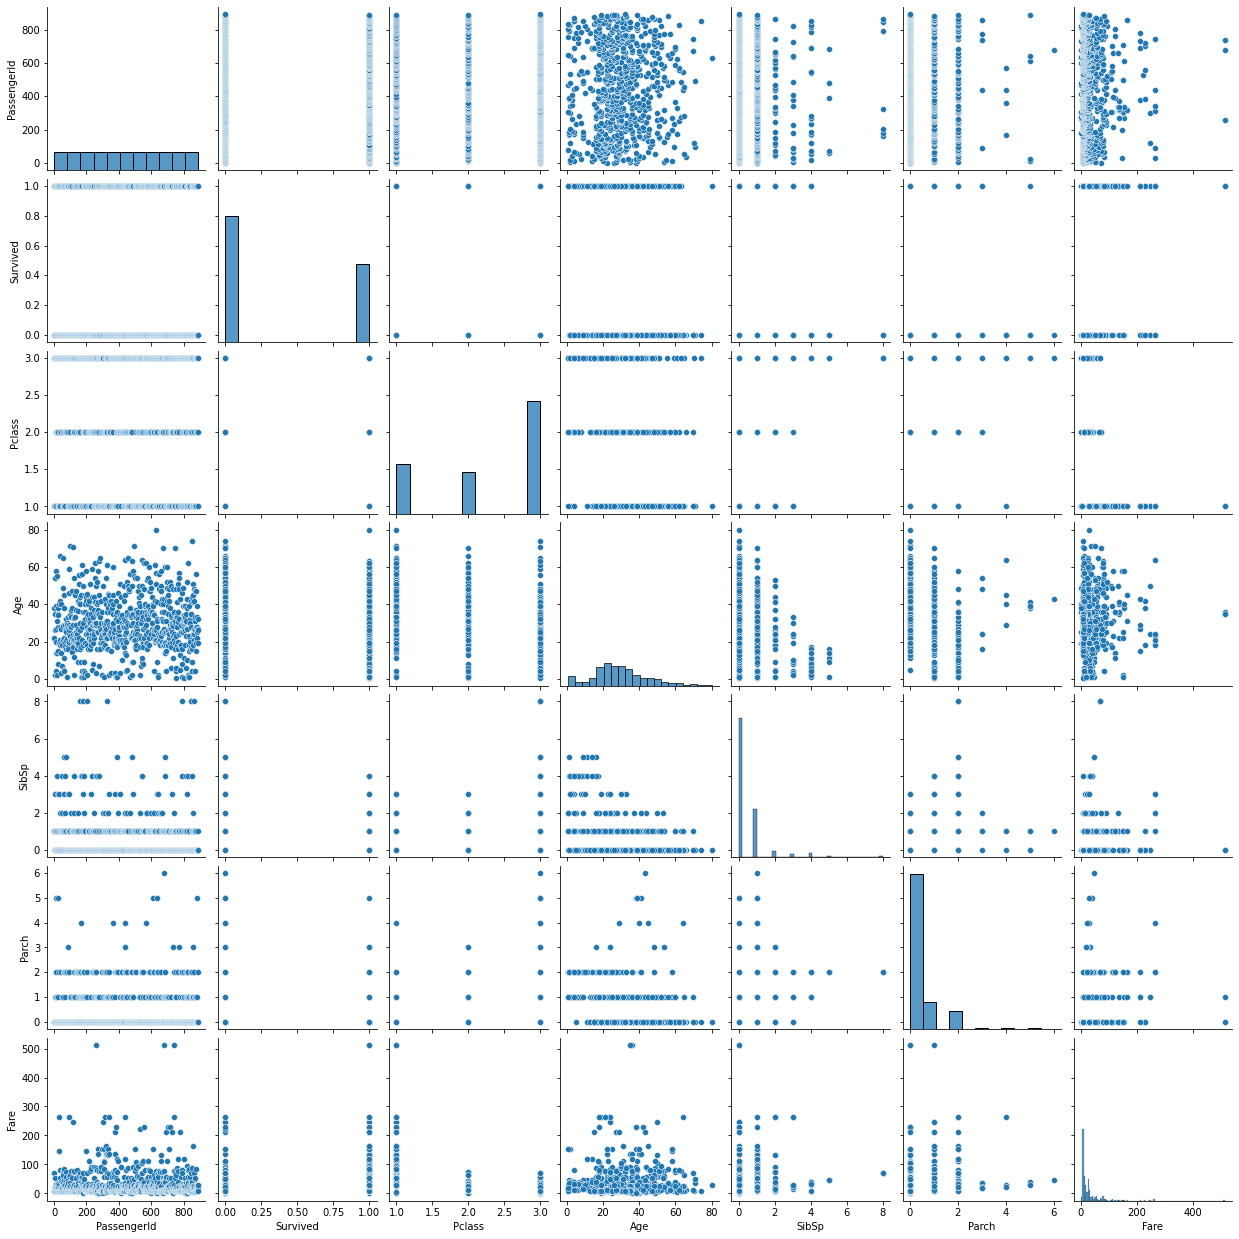

In [ ]:
#your code is here
sns.pairplot(tf)      ##by the help of the pairplot we can understand all the variables in one go